# Bab 4: Melatih Model (Training Models)

**Judul Bab:** Training Models
**Penulis:** Aurélien Géron
**Sumber:** Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition (O'Reilly) 

### 1. Pendahuluan

Bab 4 ini beranjak dari pengenalan model *machine learning* sebagai "kotak hitam" dan mulai menyelami mekanisme internal serta algoritma pelatihan. Pemahaman mendalam tentang cara kerja model ini penting untuk memilih algoritma yang tepat, menyetel *hyperparameter*, melakukan *debugging*, dan analisis kesalahan secara efisien. Konsep-konsep yang dibahas dalam bab ini juga merupakan dasar penting untuk memahami *neural network*.

Bab ini secara khusus membahas:
* Model Regresi Linier dan dua metode pelatihannya: *Normal Equation* (solusi *closed-form*) dan *Gradient Descent* (pendekatan iteratif).
* Regresi Polinomial untuk data non-linier, termasuk deteksi *overfitting* menggunakan *learning curves* dan teknik regularisasi.
* Dua model klasifikasi: Regresi Logistik dan Regresi Softmax.

Penulis juga mengingatkan pembaca bahwa bab ini melibatkan banyak persamaan matematika dengan notasi aljabar linier dan kalkulus dasar. Bagi pembaca yang tidak familiar, disarankan untuk melihat tutorial pendahuluan di materi tambahan buku.

### 2. Regresi Linier (Linear Regression)

Model regresi linier membuat prediksi dengan menghitung jumlah bobot (*weighted sum*) dari fitur-fitur input, ditambah dengan istilah bias (*bias term*) atau istilah intersep (*intercept term*).

Rumus model Regresi Linier adalah sebagai berikut:
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n $$
Dalam bentuk vektor, rumus ini menjadi:
$$ \hat{y} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x} $$
di mana:
* $\hat{y}$ adalah nilai yang diprediksi.
* $n$ adalah jumlah fitur.
* $x_i$ adalah nilai fitur ke-$i$.
* $\theta_j$ adalah parameter model ke-$j$ (termasuk istilah bias $\theta_0$ dan bobot fitur $\theta_1, \theta_2, \ldots, \theta_n$).
* $\boldsymbol{\theta}$ adalah vektor parameter model.
* $\mathbf{x}$ adalah vektor fitur *instance* (dengan $x_0$ selalu sama dengan 1).
* $\boldsymbol{\theta} \cdot \mathbf{x}$ adalah *dot product* dari $\boldsymbol{\theta}$ dan $\mathbf{x}$.
* $h_{\boldsymbol{\theta}}$ adalah fungsi hipotesis.

Tujuan pelatihan model adalah mengatur parameternya agar model paling sesuai dengan *training set*. Untuk regresi, metrik kinerja yang paling umum adalah *Root Mean Square Error* (RMSE). Namun, dalam praktiknya, lebih mudah untuk meminimalkan *Mean Squared Error* (MSE) karena menghasilkan nilai yang sama.

Fungsi biaya MSE untuk model Regresi Linier adalah:
$$ \text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m} \sum_{i=1}^{m} (\boldsymbol{\theta}^\intercal \mathbf{x}^{(i)} - y^{(i)})^2 $$ 

#### a. The Normal Equation
*Normal Equation* adalah solusi *closed-form* yang secara langsung menghitung nilai $\boldsymbol{\theta}$ yang meminimalkan fungsi biaya.
Rumusnya adalah:
$$ \boldsymbol{\theta} = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{y} $$ 
Contoh implementasi menggunakan NumPy untuk menghasilkan data linier dan menghitung $\boldsymbol{\theta}$ terbaik ditunjukkan, dan hasilnya sangat mendekati parameter asli yang digunakan untuk menghasilkan data. Penggunaan `LinearRegression` dari Scikit-Learn juga ditunjukkan, yang secara internal menggunakan fungsi `scipy.linalg.lstsq()` (berbasis *Singular Value Decomposition* atau SVD).

#### b. Computational Complexity
* **Normal Equation:** Menghitung invers dari $\mathbf{X}^\intercal \mathbf{X}$ yang merupakan matriks $(n+1) \times (n+1)$ memiliki kompleksitas komputasi sekitar $O(n^{2.4})$ hingga $O(n^3)$. Ini menjadi sangat lambat ketika jumlah fitur ($n$) sangat besar (misalnya, 100.000).
* **SVD (Scikit-Learn's `LinearRegression`):** Sekitar $O(n^2)$.
* **Prediksi:** Setelah model dilatih, prediksi sangat cepat, dengan kompleksitas linier terhadap jumlah *instance* dan jumlah fitur ($O(m \times n)$).

### 3. Gradient Descent

*Gradient Descent* adalah algoritma optimisasi generik yang secara iteratif menyesuaikan parameter untuk meminimalkan fungsi biaya. Ide dasarnya adalah mengukur *local gradient* dari fungsi *error* terhadap vektor parameter $\boldsymbol{\theta}$ dan bergerak ke arah *gradient* yang menurun. Ketika *gradient* nol, titik minimum telah tercapai.

**Parameter penting:**
* **Learning Rate ($\eta$):** Menentukan ukuran langkah. Jika terlalu kecil, konvergensi akan lambat. Jika terlalu besar, algoritma bisa divergen atau melewati minimum.
* **Pitfalls:** Algoritma bisa terjebak pada *local minimum* atau membutuhkan waktu lama untuk melewati *plateau* jika fungsi biaya tidak *convex*. Namun, untuk fungsi biaya MSE pada Regresi Linier, yang bersifat *convex* dan halus, *Gradient Descent* dijamin mendekati *global minimum*.
* **Feature Scaling:** Penting untuk memastikan semua fitur memiliki skala yang serupa, jika tidak, fungsi biaya akan terlihat seperti mangkuk memanjang, memperlambat konvergensi *Gradient Descent*.

Rumus vektor *gradient* dari fungsi biaya:
$$ \nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) = \frac{2}{m} \mathbf{X}^\intercal (\mathbf{X} \boldsymbol{\theta} - \mathbf{y}) $$ 
Langkah *Gradient Descent*:
$$ \boldsymbol{\theta}_{\text{next step}} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) $$ 

#### a. Batch Gradient Descent
Algoritma ini menggunakan seluruh *training set* untuk menghitung *gradient* pada setiap langkah. Ini membuatnya sangat lambat pada *training set* yang besar. Namun, skalanya baik dengan jumlah fitur.

#### b. Stochastic Gradient Descent
Berbeda dengan *Batch Gradient Descent*, *Stochastic Gradient Descent* (SGD) mengambil satu *instance* acak dari *training set* pada setiap langkah untuk menghitung *gradient* berdasarkan *instance* tunggal tersebut. Ini membuatnya jauh lebih cepat karena hanya satu *instance* yang perlu ada di memori pada setiap iterasi. Namun, sifatnya yang *stochastic* membuat fungsi biaya "memantul" di sekitar minimum dan tidak pernah benar-benar stabil. Ini bisa membantu melarikan diri dari *local minimum* pada fungsi biaya yang tidak beraturan.
Untuk mengatasi ketidakstabilan, *learning rate* ($\eta$) dikurangi secara bertahap menggunakan *learning schedule*.
Penggunaan `SGDRegressor` dari Scikit-Learn ditunjukkan untuk implementasi SGD Regresi Linier.

#### c. Mini-batch Gradient Descent
Algoritma ini menghitung *gradient* pada kelompok kecil (*mini-batches*) dari *instance* acak. Ini menawarkan keuntungan kinerja dari optimisasi *hardware* untuk operasi matriks (terutama dengan GPU). Kemajuannya di ruang parameter lebih stabil daripada SGD, tetapi mungkin lebih sulit untuk melarikan diri dari *local minimum*.

**Perbandingan Algoritma Regresi Linier:**
Tabel perbandingan disajikan untuk *Normal Equation*, SVD, *Batch GD*, *Stochastic GD*, dan *Mini-batch GD* berdasarkan skala data ($m$), dukungan *out-of-core*, skala fitur ($n$), *hyperparameter*, dan kebutuhan *scaling*.

### 4. Regresi Polinomial (Polynomial Regression)

*Regresi Polinomial* memungkinkan model linier untuk menyesuaikan data non-linier dengan menambahkan pangkat dari setiap fitur sebagai fitur baru, kemudian melatih model linier pada set fitur yang diperluas ini.
Contoh: untuk fitur $x_1$, fitur baru $x_1^2$ akan ditambahkan. Jika ada banyak fitur, `PolynomialFeatures` juga dapat menambahkan kombinasi fitur hingga derajat yang diberikan (misalnya, $ab, a^2b, ab^2$ untuk derajat 3 dengan fitur $a$ dan $b$).
Implementasi menggunakan `PolynomialFeatures` dari Scikit-Learn ditunjukkan.

#### a. Learning Curves
*Learning curves* adalah plot kinerja model pada *training set* dan *validation set* sebagai fungsi dari ukuran *training set* (atau iterasi pelatihan). Ini membantu mendiagnosis apakah model *overfitting* atau *underfitting*.
* **Underfitting:** Kedua kurva (*training* dan *validation*) mencapai *plateau*, berdekatan, dan cukup tinggi. Menambah data pelatihan tidak akan membantu.
* **Overfitting:** *Error* pada data pelatihan jauh lebih rendah daripada data validasi, dan ada celah antara kurva. Menambah data pelatihan dapat membantu mengurangi celah.

#### b. The Bias/Variance Trade-off
*Error* generalisasi model dapat diekspresikan sebagai jumlah dari tiga jenis *error*:
* **Bias:** Disebabkan oleh asumsi yang salah (misalnya, asumsi data linier padahal kuadratik). Model *high-bias* cenderung *underfit*.
* **Variance:** Disebabkan oleh sensitivitas model yang berlebihan terhadap variasi kecil dalam data pelatihan. Model dengan banyak derajat kebebasan (*high-variance*) cenderung *overfit*.
* **Irreducible Error:** Disebabkan oleh *noise* pada data itu sendiri. Hanya dapat dikurangi dengan membersihkan data.
Meningkatkan kompleksitas model biasanya meningkatkan *variance* dan mengurangi *bias*, dan sebaliknya. Ini disebut *trade-off*.

### 5. Model Linier yang Diregularisasi (Regularized Linear Models)

Regularisasi adalah cara untuk mengurangi *overfitting* dengan membatasi model. Untuk model linier, regularisasi biasanya dicapai dengan membatasi bobot model.

#### a. Ridge Regression
*Ridge Regression* (regularisasi Tikhonov) menambahkan istilah regularisasi $\alpha \sum_{i=1}^{n} \theta_i^2$ ke fungsi biaya. Ini memaksa algoritma pelatihan untuk tidak hanya menyesuaikan data tetapi juga menjaga bobot model sekecil mungkin. $\alpha$ mengontrol seberapa besar regularisasi.
Fungsi biaya *Ridge Regression*:
$$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2 $$ 
Penting untuk melakukan *feature scaling* sebelum *Ridge Regression* karena sensitif terhadap skala fitur input. Solusi *closed-form* tersedia, tetapi juga dapat dilatih dengan *Gradient Descent*.

#### b. Lasso Regression
*Lasso Regression* (Least Absolute Shrinkage and Selection Operator Regression) menambahkan istilah regularisasi $\alpha \sum_{i=1}^{n} |\theta_i|$ ke fungsi biaya.
Fungsi biaya *Lasso Regression*:
$$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum_{i=1}^{n} |\theta_i| $$ 
Karakteristik penting *Lasso Regression* adalah cenderung menghilangkan bobot fitur yang paling tidak penting (menyetelnya menjadi nol), sehingga melakukan seleksi fitur otomatis dan menghasilkan model *sparse*.

#### c. Elastic Net
*Elastic Net* adalah gabungan antara *Ridge Regression* dan *Lasso Regression*. Istilah regularisasinya adalah campuran dari keduanya, dikendalikan oleh rasio campuran $r$.
Fungsi biaya *Elastic Net*:
$$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2 $$ 
*Elastic Net* umumnya lebih disukai daripada *Lasso* karena *Lasso* dapat berperilaku tidak menentu dalam kasus tertentu (misalnya, ketika fitur sangat berkorelasi atau jumlah fitur lebih banyak dari *instance* pelatihan). Model linier tanpa regularisasi (Plain Linear Regression) jarang direkomendasikan.

#### d. Early Stopping
*Early stopping* adalah cara regularisasi algoritma pembelajaran iteratif (*Gradient Descent*) dengan menghentikan pelatihan segera setelah *error* validasi mencapai minimum. Ini adalah teknik yang sederhana dan efisien.

### 6. Regresi Logistik (Logistic Regression)

*Regresi Logistik* (juga disebut *Logit Regression*) umumnya digunakan untuk memperkirakan probabilitas suatu *instance* termasuk dalam kelas tertentu (misalnya, email spam). Jika probabilitas yang diperkirakan lebih besar dari 50%, model memprediksi kelas positif (label "1"), jika tidak, kelas negatif (label "0"). Ini adalah pengklasifikasi biner.

#### a. Estimating Probabilities
Model regresi logistik menghitung jumlah bobot fitur input (plus istilah bias), kemudian mengaplikasikan fungsi logistik (sigmoid) pada hasilnya.
Fungsi logistik ($\sigma$) didefinisikan sebagai:
$$ \sigma(t) = \frac{1}{1 + \exp(-t)} $$ 
Model memprediksi 1 jika $\mathbf{x}^\intercal \boldsymbol{\theta}$ positif, dan 0 jika negatif.

#### b. Training and Cost Function
Tujuan pelatihan adalah mengatur $\boldsymbol{\theta}$ sehingga model memperkirakan probabilitas tinggi untuk *instance* positif dan probabilitas rendah untuk *instance* negatif.
Fungsi biaya untuk satu *instance* pelatihan:
$$ c(\boldsymbol{\theta}) = \begin{cases} -\log(\hat{p}) & \text{if } y = 1 \\ -\log(1 - \hat{p}) & \text{if } y = 0 \end{cases} $$ 
Fungsi biaya untuk seluruh *training set* adalah *log loss* (*cross-entropy*), yang merupakan rata-rata biaya dari semua *instance* pelatihan.
$$ J(\boldsymbol{\theta}) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})] $$ 
Tidak ada solusi *closed-form* untuk meminimalkan fungsi biaya ini, tetapi fungsi ini *convex*, sehingga *Gradient Descent* dijamin menemukan *global minimum*.

#### c. Decision Boundaries
Contoh menggunakan dataset Iris ditunjukkan untuk mengilustrasikan batas keputusan linier yang dibuat oleh pengklasifikasi regresi logistik. Seperti model linier lainnya, model regresi logistik dapat diregularisasi menggunakan penalti $\ell_1$ atau $\ell_2$. Scikit-Learn menggunakan penalti $\ell_2$ secara *default*, dikendalikan oleh *hyperparameter* `C` (semakin tinggi `C`, semakin sedikit regularisasi).

### 7. Regresi Softmax (Softmax Regression)

*Regresi Softmax* (atau *Multinomial Logistic Regression*) adalah generalisasi model regresi logistik yang mendukung banyak kelas secara langsung, tanpa perlu melatih beberapa pengklasifikasi biner.
Model menghitung skor $s_k(\mathbf{x})$ untuk setiap kelas $k$:
$$ s_k(\mathbf{x}) = \mathbf{x}^\intercal \boldsymbol{\theta}^{(k)} $$ 
Kemudian, probabilitas setiap kelas diperkirakan dengan mengaplikasikan fungsi *softmax* ke skor:
$$ \hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))} $$ 
Pengklasifikasi memprediksi kelas dengan probabilitas tertinggi (skor tertinggi). Ini hanya digunakan untuk kelas-kelas yang saling eksklusif (misalnya, berbagai jenis tanaman).

Fungsi biaya yang digunakan adalah *cross-entropy*:
$$ J(\mathbf{\Theta}) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)}) $$ 
Jika hanya ada dua kelas, fungsi biaya ini setara dengan fungsi biaya regresi logistik. Fungsi ini juga *convex*, sehingga dapat diminimalkan dengan *Gradient Descent*. Scikit-Learn's `LogisticRegression` dapat diatur untuk menggunakan *Softmax Regression* dengan `multi_class="multinomial"`.

### 8. Kesimpulan Bab

Bab ini berhasil menguraikan dasar-dasar model linier, termasuk Regresi Linier dan Regresi Logistik, serta bagaimana melatihnya menggunakan *Normal Equation* dan berbagai varian *Gradient Descent*. Pentingnya *feature scaling*, *learning rate*, dan regularisasi dibahas secara mendalam untuk mengatasi *underfitting* dan *overfitting*. Pemahaman tentang *learning curves* juga menjadi alat diagnostik yang vital. Bagian terakhir tentang *Softmax Regression* menunjukkan bagaimana model linier dapat diperluas untuk tugas klasifikasi multikelas.

### 9. Pertanyaan dan Latihan (bagi Pembaca)

Bab ini diakhiri dengan serangkaian pertanyaan dan latihan yang dirancang untuk menguji pemahaman dan mendorong aplikasi praktis dari konsep-konsep yang telah dipelajari. Ini mencakup pertanyaan konseptual tentang algoritma *Gradient Descent*, *scaling*, *regularisasi*, serta latihan implementasi seperti *Batch Gradient Descent* dengan *early stopping* untuk *Softmax Regression*.

## 1. Linear Regression

In [76]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

### Normal Equation

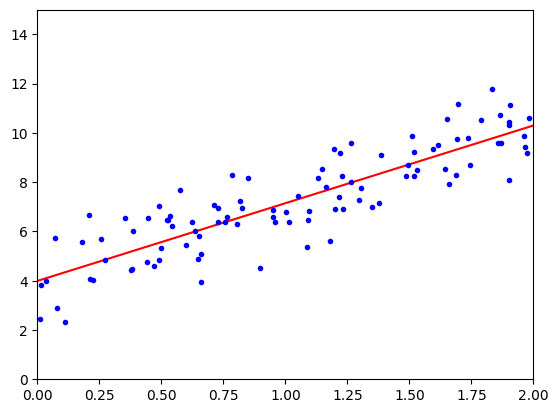

In [77]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regression using Scikit-Learn

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.99110024],
       [10.2987917 ]])

### SVD (Alternative to Normal Equation)

In [79]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
np.linalg.pinv(X_b).dot(y)

array([[3.99110024],
       [3.15384573]])

## 2. Gradient Descent

### Batch Gradient Descen

In [80]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

### Stochastic Gradient Descen

In [81]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [82]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.94686158]), array([3.1254379]))

## 3. Polynomial Regression

### Generating some nonlinear data

In [83]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

### Applying PolynomialFeatures and LinearRegression

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0]
X_poly[0]

array([-1.48272648,  2.19847781])

In [85]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88136241]), array([[0.98344477, 0.51033451]]))

### Leaning Curves

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.show()

### Learning curves for Linear Regression

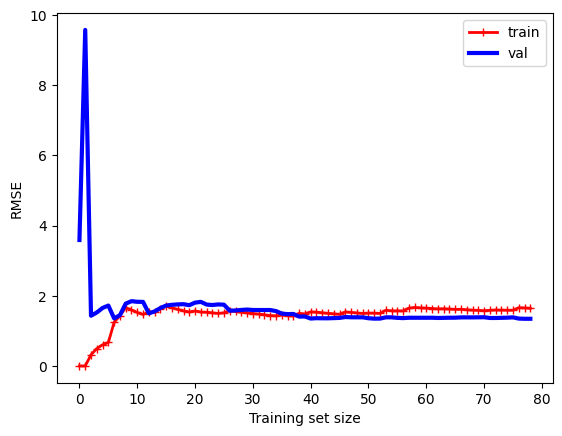

In [87]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### Learning curves for 10th-degree Polynomial Regression

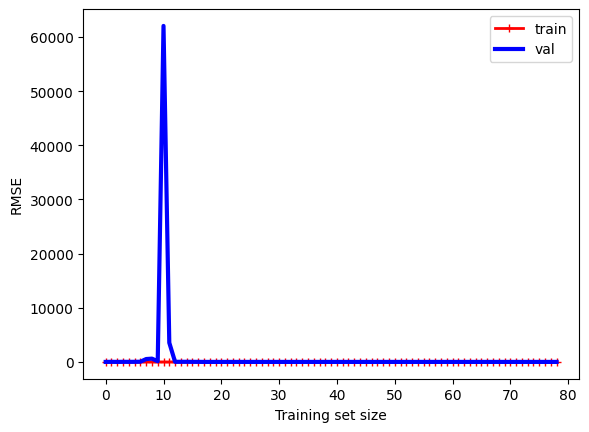

In [88]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

## 4. Regularized Linear Models

### Ridge Regression

In [89]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([4.86272032])

In [90]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.85047009])

### Lasso Regression

In [91]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.81770407])

### Elastic Net

In [92]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.81705362])

### Early Stopping

In [93]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    else:
        # Simple check for early stopping (though the book's example implies breaking here)
        # For full early stopping, you would track patience here
        pass

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages

## 5. Logistic Regression

### Estimating Probabilities & Decision Boundaries

In [94]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

In [95]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

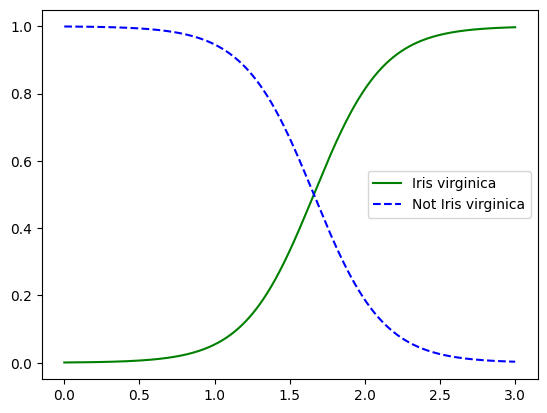

In [101]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# This part needs additional matplotlib code to visualize the plot, 
# similar to Figure 4-23 in the book.
# For a full reproduction of the plot, you'd add:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.show()

In [97]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 6. Softmax Regression

In [98]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [99]:
softmax_reg.predict([[5, 2]])

array([2])

In [100]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626370e-07, 5.73689802e-02, 9.42630398e-01]])